In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
original_df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'])

original_df.head()



,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [17]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
bottom = original_df['value'].quantile(0.025)
top = original_df['value'].quantile(0.975)
df = original_df[(original_df['value'] > bottom) & (original_df['value'] < top)]
print(df)


           date   value
10   2016-05-19   19736
17   2016-05-26   18060
18   2016-05-27   19997
19   2016-05-28   19044
20   2016-05-29   20325
...         ...     ...
1294 2019-11-24  138875
1299 2019-11-29  171584
1300 2019-11-30  141161
1301 2019-12-01  142918
1303 2019-12-03  158549

[1238 rows x 2 columns]


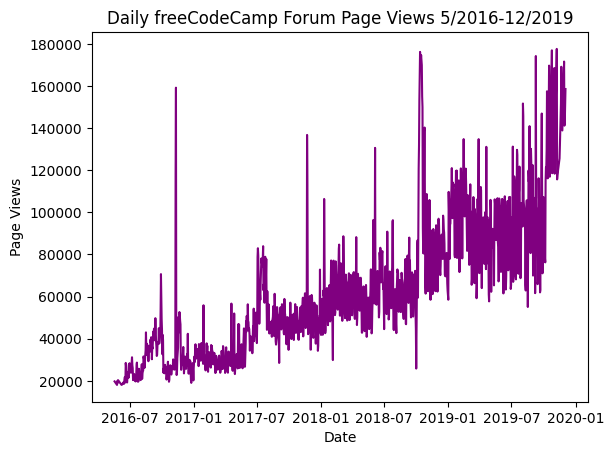

In [18]:
def draw_line_plot():
    fig, ax = plt.subplots()
    
    ax.plot(df['date'], df['value'], color='purple')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Draw line plot  reate a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".  . The label on the x axis should be Date and the label on the y axis should be Page Views.

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

fig = draw_line_plot()
plt.show()

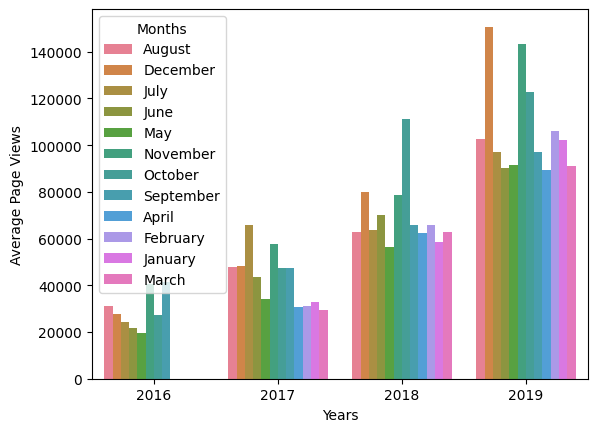

In [19]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    
    #Convert date column to datetime
    df_bar['date'] = pd.to_datetime(df_bar['date'])
    df_bar['year'] = df_bar['date'].dt.year
    df_bar['month'] = df_bar['date'].dt.month
    df_bar['month_name'] = df_bar['date'].dt.month_name()  # Convert month number to month name
   
    #calculate average daily page views for each month grouped by year
    df_avg = df_bar.groupby(['year', 'month_name']).mean().reset_index()
   
     

    #Draw bar plot
    fig, ax = plt.subplots()
    sns.barplot(x='year', y='value', data=df_avg, hue='month_name', ax=ax)
    
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    plt.legend(title='Months')
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

fig = draw_bar_plot()
plt.show()

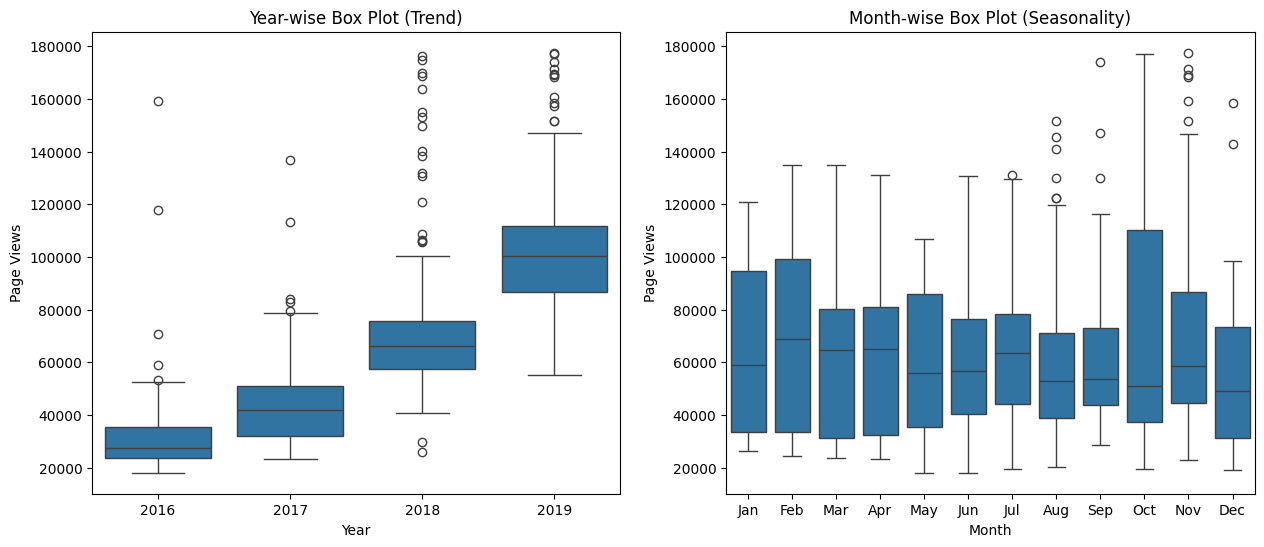

In [20]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
     # Start drawing the box plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Year-wise Box Plot
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise Box Plot
    # Ensure the months are in order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

fig = draw_box_plot()
plt.show()